In [1]:
import saspy
sas = saspy.SASsession()

Using SAS Config named: oda
SAS Connection established. Subprocess id is 4136




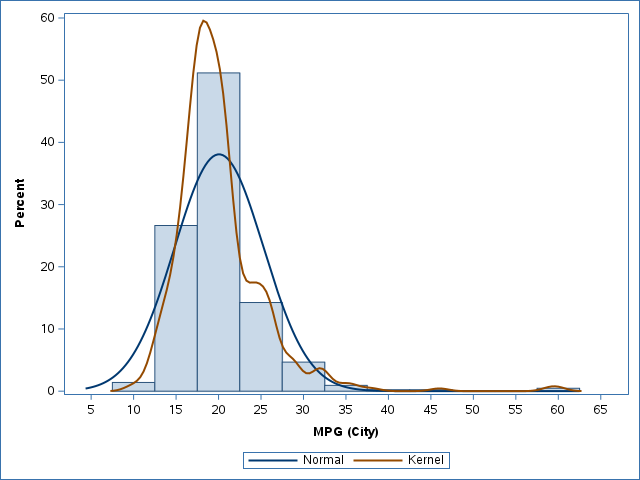

In [8]:
# histogram and density curves
# tickmark at bin center
sas.submitLST(
f"""
proc sgplot data=SASHELP.CARS;
    histogram MPG_City / showbins;
    density MPG_City;
    density MPG_City / type=kernel;
run;
""")

### options


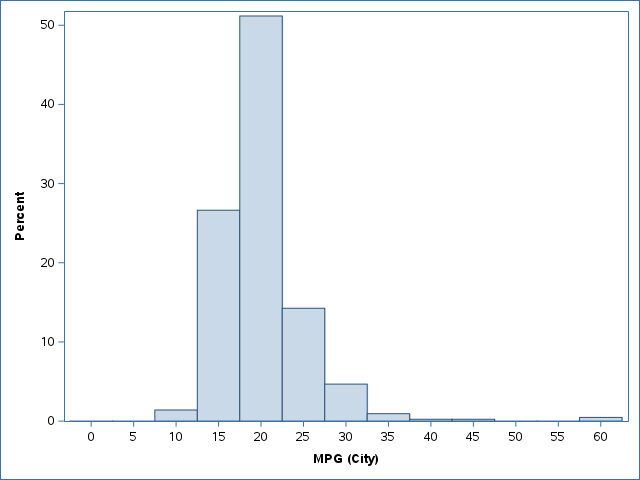

In [24]:
# binstart, binwidth
sas.submitLST(
f"""
proc sgplot data=SASHELP.CARS;
    histogram MPG_City / showbins binstart=0 binwidth=5;
run;
""")


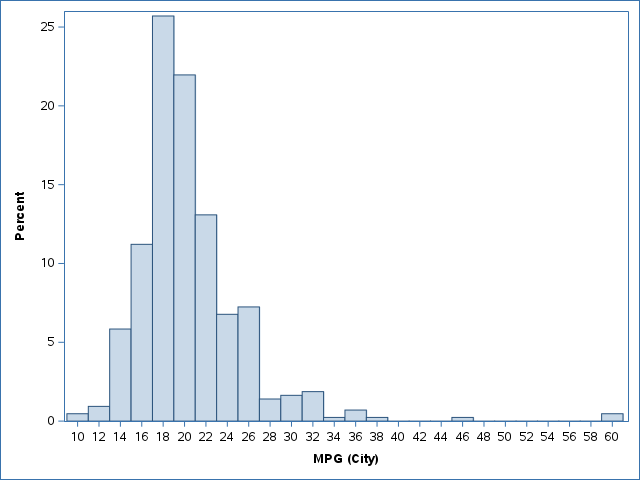

In [26]:
# binwidth
sas.submitLST(
f"""
proc sgplot data=SASHELP.CARS;
    histogram MPG_City / showbins binwidth=2;
run;
""")


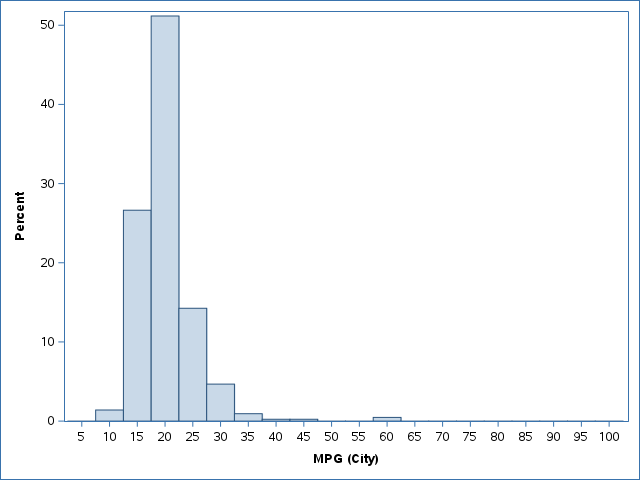

In [ ]:
# nbins
sas.submitLST(
f"""
proc sgplot data=SASHELP.CARS;
    histogram MPG_City / showbins nbins=20;
run;
""")


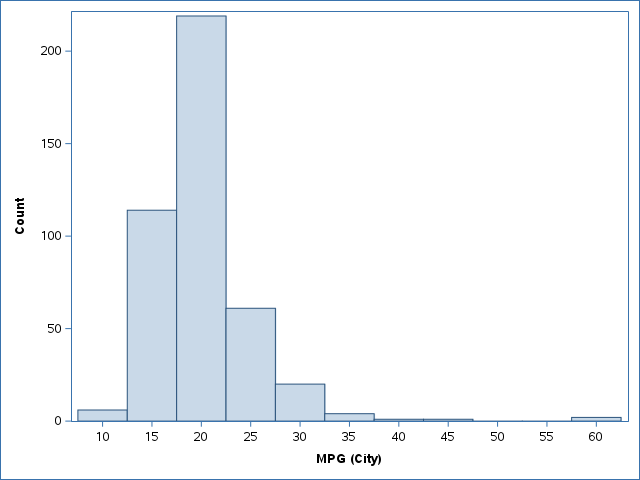

In [14]:
# scale
sas.submitLST(
f"""
proc sgplot data=SASHELP.CARS;
    histogram MPG_City / showbins scale=count;
run;
""")


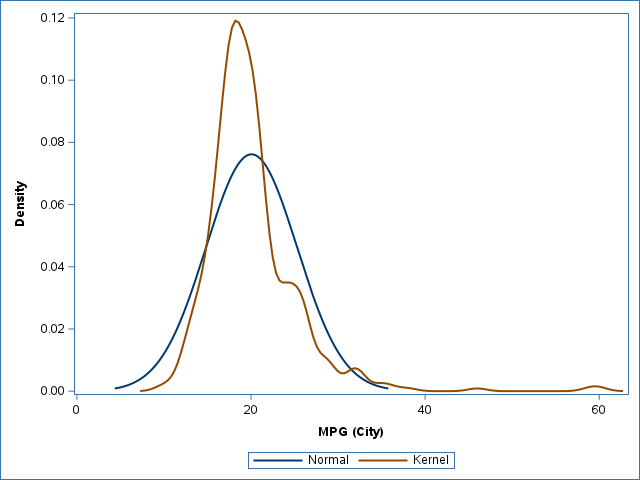

In [7]:
# density type
sas.submitLST(
f"""
proc sgplot data=SASHELP.CARS;
    density MPG_City;
    density MPG_City / type=Kernel;
run;
""")